Matriz A = [[0.99168 1.     ]
 [0.00832 0.     ]]
Valores propios de A son = [ 1.      -0.00832]
Vectores propios de A son = [[ 0.99996539 -0.70710678]
 [ 0.00831971  0.70710678]]
Soluciones polinomio característico
Lambda1= 1.0
Lambda2= -0.00832000000000005
Constantes de solución:
c1= 25000000000000.0
c2= -0.0
c3= 207999999999.99997
c4= -0.0


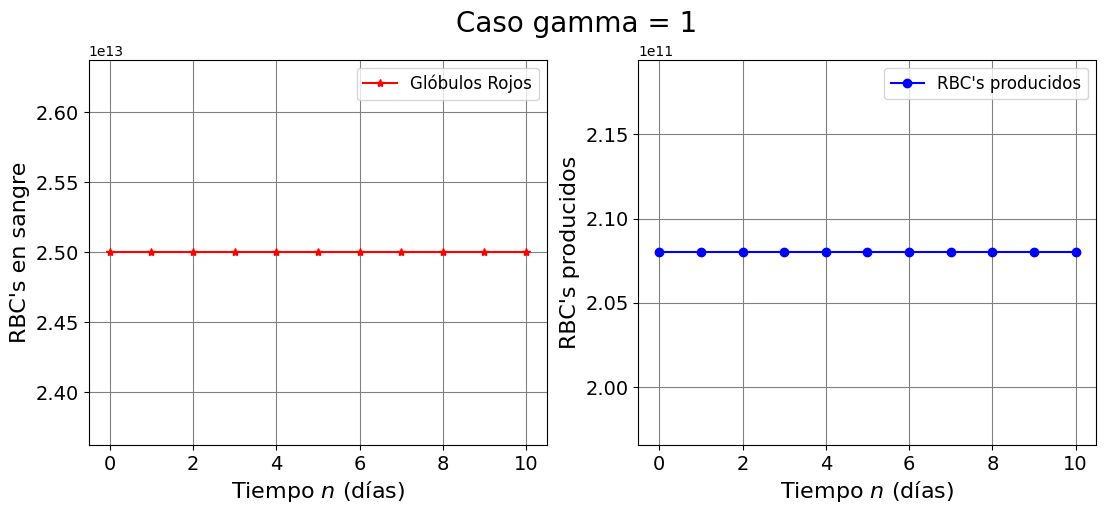

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO BASE - CASO GAMMA = 1

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 1
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    y[i] = res[1]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))
fig.suptitle('Caso gamma = 1', fontsize='20')
ax1.plot(n, x, color='red',marker='*',label='Glóbulos Rojos') # GlobRoj
ax1.legend(fontsize='12')
ax1.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax1.set_ylabel('RBC\'s en sangre',fontsize='16')
ax1.tick_params(labelsize=14)
ax1.grid(color= 'grey')
ax2.plot(n, y, color='blue',marker='o',label='RBC\'s producidos') # CMH
ax2.legend(fontsize='12')
ax2.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax2.set_ylabel('RBC\'s producidos',fontsize='16')
ax2.tick_params(labelsize=14)
ax2.grid(color= 'grey')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print("Soluciones polinomio característico")
print("Lambda1= "+str(solucion1))
print("Lambda2= "+str(solucion2))
a = np.array([[1,1],[solucion1, solucion2]])
b = np.array([x0,x[1]])
equilibrios = np.linalg.solve(a,b)
print("Constantes de solución:")
print("c1= "+str(equilibrios[0]))
print("c2= "+str(equilibrios[1]))
print("c3= "+str(gamma * f * equilibrios[0]))
print("c4= "+str(gamma * f * equilibrios[1]))

Matriz A = [[0.99168  1.      ]
 [0.005824 0.      ]]
Valores propios de A son = [ 0.99751849 -0.00583849]
Vectores propios de A son = [[ 0.99998296 -0.70798467]
 [ 0.00583839  0.7062278 ]]
Soluciones polinomio característico
Lambda1= 0.9975184882771035
Lambda2= -0.005838488277103593
Constantes de solución:
c1= 25061830230438.49
c2= -61830230438.48693
c3= 145960099262.07373
c4= -360099262.0737478


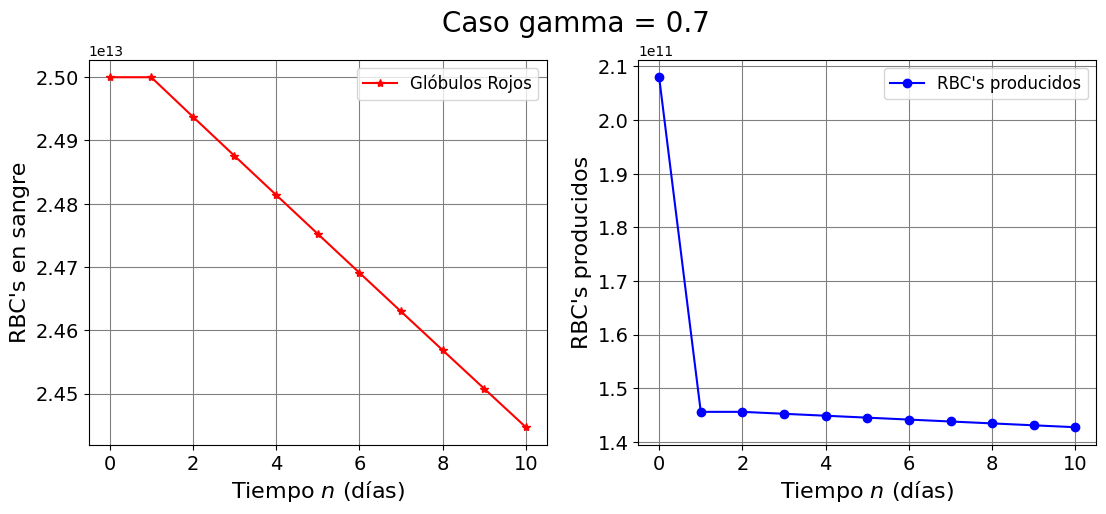

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO BASE - CASO GAMMA = 0.7
##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 0.7
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
minimo = True
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    if x[i]< x0/2 and minimo == True:
        minimo = False
        print("En el día "+str(i)+ " se han reducido a la mitad los glóbulos rojos")
    y[i] = res[1]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))
fig.suptitle('Caso gamma = 0.7', fontsize='20')
ax1.plot(n, x, color='red',marker='*',label='Glóbulos Rojos') # GlobRoj
ax1.legend(fontsize='12')
ax1.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax1.set_ylabel('RBC\'s en sangre',fontsize='16')
ax1.tick_params(labelsize=14)
ax1.grid(color= 'grey')
ax2.plot(n, y, color='blue',marker='o',label='RBC\'s producidos') # CMH
ax2.legend(fontsize='12')
ax2.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax2.set_ylabel('RBC\'s producidos',fontsize='16')
ax2.tick_params(labelsize=14)
ax2.grid(color= 'grey')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print("Soluciones polinomio característico")
print("Lambda1= "+str(solucion1))
print("Lambda2= "+str(solucion2))
a = np.array([[1,1],[solucion1, solucion2]])
b = np.array([x0,x[1]])
equilibrios = np.linalg.solve(a,b)
print("Constantes de solución:")
print("c1= "+str(equilibrios[0]))
print("c2= "+str(equilibrios[1]))
print("c3= "+str(gamma * f * equilibrios[0]))
print("c4= "+str(gamma * f * equilibrios[1]))

Matriz A = [[0.99168  1.      ]
 [0.010816 0.      ]]
Valores propios de A son = [ 1.00246936 -0.01078936]
Vectores propios de A son = [[ 0.9999418  -0.70623427]
 [ 0.01078873  0.70797822]]
Soluciones polinomio característico
Lambda1= 1.0024693572228123
Lambda2= -0.010789357222812324
Constantes de solución:
c1= 24939073871568.84
c2= 60926128431.1596
c3= 269741022994.88855
c4= 658977005.1114222


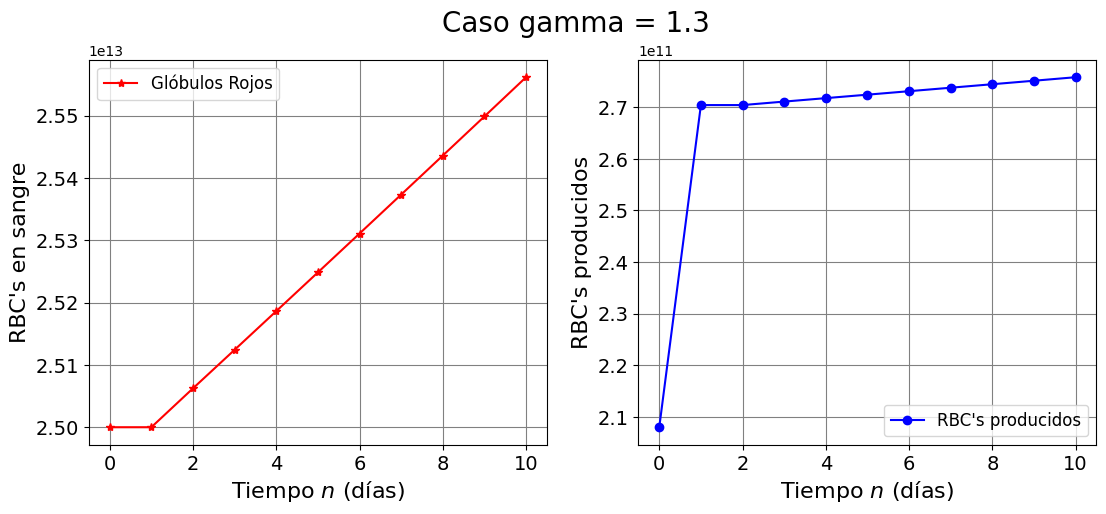

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig
##MODELO BASE - CASO GAMMA = 1.3
##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 1.3
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
minimo = True
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    if x[i]>=x0*2 and minimo == True:
        minimo = False
        print("En el día "+str(i)+ " se han duplicado los glóbulos rojos")
    y[i] = res[1]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))
fig.suptitle('Caso gamma = 1.3', fontsize='20')
ax1.plot(n, x, color='red',marker='*',label='Glóbulos Rojos') # GlobRoj
ax1.legend(fontsize='12')
ax1.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax1.set_ylabel('RBC\'s en sangre',fontsize='16')
ax1.tick_params(labelsize=14)
ax1.grid(color= 'grey')
ax2.plot(n, y, color='blue',marker='o',label='RBC\'s producidos') # CMH
ax2.legend(fontsize='12')
ax2.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax2.set_ylabel('RBC\'s producidos',fontsize='16')
ax2.tick_params(labelsize=14)
ax2.grid(color= 'grey')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print("Soluciones polinomio característico")
print("Lambda1= "+str(solucion1))
print("Lambda2= "+str(solucion2))
a = np.array([[1,1],[solucion1, solucion2]])
b = np.array([x0,x[1]])
equilibrios = np.linalg.solve(a,b)
print("Constantes de solución:")
print("c1= "+str(equilibrios[0]))
print("c2= "+str(equilibrios[1]))
print("c3= "+str(gamma * f * equilibrios[0]))
print("c4= "+str(gamma * f * equilibrios[1]))

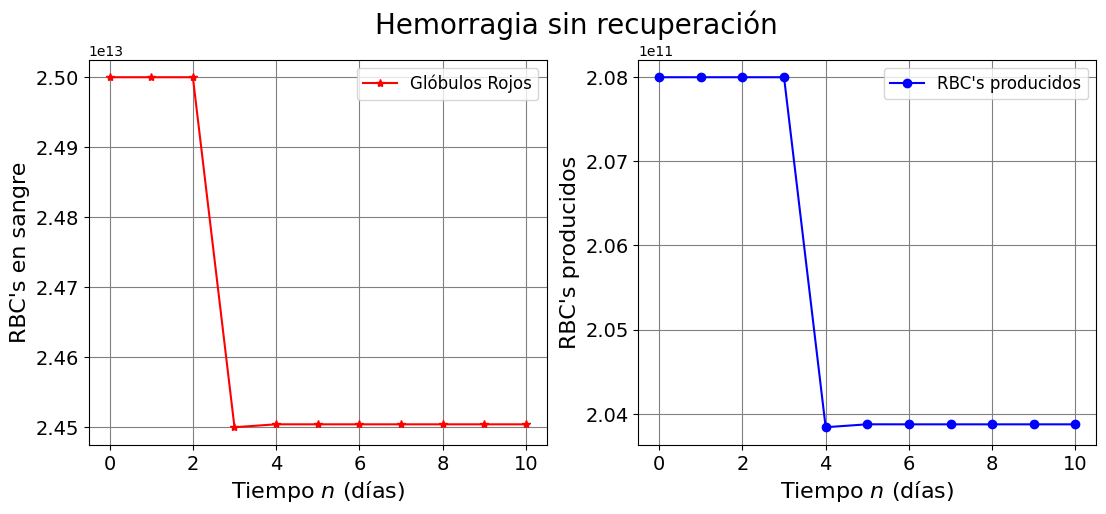

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO HEMORRAGIA - CASO BASE 

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 1
f = 0.00832
perdida = 0.02


##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    y[i] = res[1]
    if i != 3:
        x[i] = res[0]
    else:
        x[i] = res[0]-perdida*x[i-1]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))
fig.suptitle('Hemorragia sin recuperación', fontsize='20')
ax1.plot(n, x, color='red',marker='*',label='Glóbulos Rojos') # GlobRoj
ax1.legend(fontsize='12')
ax1.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax1.set_ylabel('RBC\'s en sangre',fontsize='16')
ax1.tick_params(labelsize=14)
ax1.grid(color= 'grey')
ax2.plot(n, y, color='blue',marker='o',label='RBC\'s producidos') # CMH
ax2.legend(fontsize='12')
ax2.set_xlabel('Tiempo $n$ (días)',fontsize='16')
ax2.set_ylabel('RBC\'s producidos',fontsize='16')
ax2.tick_params(labelsize=14)
ax2.grid(color= 'grey')

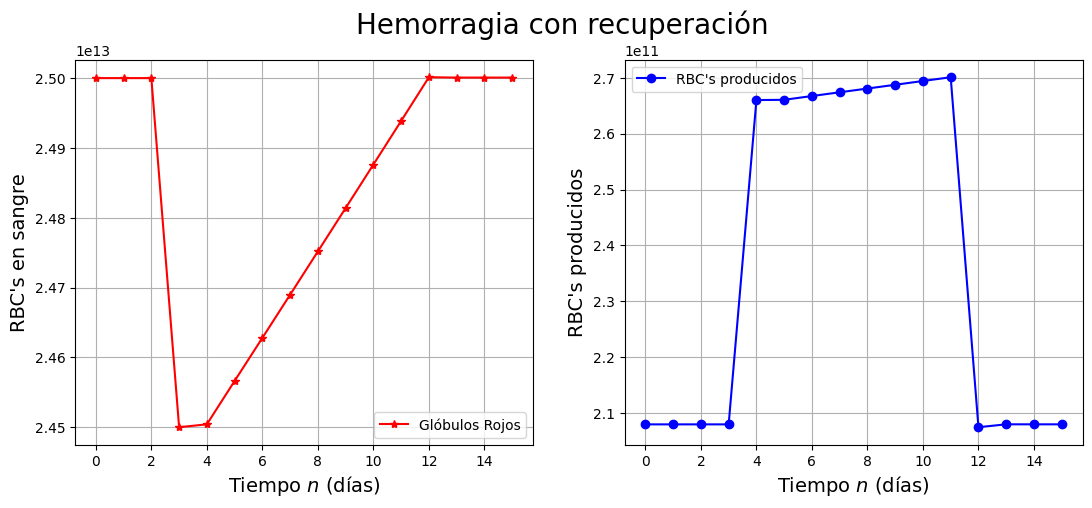

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO HEMORRAGIA - CASO BASE 

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma1 = 1
gamma2 = 1.305
f = 0.00832
perdida = 0.02


##Arreglo de días
N = 15
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma1*f*x
    return [gr,cm]

def fun2(x,y):
    gr = (1-f)*x+y
    cm = gamma2*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    if res[0]< x0:
        res = fun2(x[i-1],y[i-1])
    y[i] = res[1]
    if i != 3:
        x[i] = res[0]
    else:
        x[i] = res[0]-perdida*x[i-1]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))
fig.suptitle('Hemorragia con recuperación', fontsize='20')
ax1.plot(n, x, color='red',marker='*',label='Glóbulos Rojos') # GlobRoj
ax1.legend()
ax1.set_xlabel('Tiempo $n$ (días)',fontsize='14')
ax1.set_ylabel('RBC\'s en sangre',fontsize='14')
ax1.grid()
ax2.plot(n, y, color='blue',marker='o',label='RBC\'s producidos') # CMH
ax2.legend()
ax2.set_xlabel('Tiempo $n$ (días)',fontsize='14')
ax2.set_ylabel('RBC\'s producidos',fontsize='14')
ax2.grid()
